<a href="https://colab.research.google.com/github/Marcos-Sanson/UC3M-Web-Analytics/blob/main/Web_Analytics_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Analytics – Final Project**  
## *(1st Semester, 4th-year-level Course)*
## Data Science and Engineering Degree at Universidad Carlos III de Madrid

## **Job Market Analytics & Recommendation System Project**  

This final project was part of my **Web Analytics course at Universidad Carlos III de Madrid (UC3M)**, where I studied abroad from **September 2024 to December 2024**. The goal of this project was to **develop a job market analytics and recommendation platform** that helps students and recent graduates find **personalized job matches**, track application history, and receive feedback to improve their chances of employment. This project was completed in a group of three people.  

Unlike existing platforms such as **LinkedIn, Indeed, and Glassdoor**, this project **integrated Natural Language Processing (NLP) and machine learning** for enhanced job matching, an **interactive job map**, **data visualizations**, and **salary trend analysis** to provide **real-time insights into the job market**.  

## **Project Overview**  
We used the **Adzuna API** to retrieve **real-time job postings** from multiple cities, including **London, New York, San Francisco, and Los Angeles**. Our system extracted key details such as **job titles, locations, salaries, companies, and descriptions**, which were then processed for **NLP-based job matching, salary analysis, and skill recommendations**.  

### **Key Features & Methodology**  
- **Real-time job data retrieval** via the **Adzuna API**, handling API rate limits and missing data.  
- **Natural Language Processing (NLP)** using **TF-IDF (Term Frequency-Inverse Document Frequency)** and **cosine similarity** to match job descriptions to user profiles.  
- **Salary trend analysis** using **historical salary data** and **time-series visualizations**.  
- **Geographic job market insights** via **Folium interactive maps** to display job distributions.  
- **Job skill gap analysis** by identifying **high-demand skills** and **recommending career development paths**.  

## **Challenges Faced & Solutions**  
- **API Rate Limits & Data Gaps**: We optimized requests and handled missing salary/location data with median imputation.  
- **Duplicate Job Listings**: We filtered redundant records and cleaned inconsistencies in company names and job titles.  
- **Language & Stop Words in NLP**: Since job descriptions varied in formatting, we removed irrelevant stop words to improve **TF-IDF similarity scoring**.  
- **Limited Historical Data**: The API only allowed job category-based trends, restricting fine-grained job-specific tracking.  

## **Data Analysis & Insights**  

### **NLP-Based Job Matching**  
- We converted **job descriptions and user skills into vectorized representations** using **TF-IDF** and computed **cosine similarity** to rank job recommendations.  
- The system **prioritized roles that closely matched the user’s experience and skills** over generic listings.  

### **Salary Trends & Market Insights**  
- **Time-series plots** visualized salary growth trends for **Data Science, Cybersecurity, and Software Engineering** roles across different cities.  
- **Bar plots and box plots** provided insights into **salary distributions**, helping users identify **high-paying locations and industries**.  

### **Skill Gap Analysis & Career Recommendations**  
- We analyzed job descriptions to identify **most in-demand skills** (e.g., **AWS, Azure, Python, SQL**).  
- The system recommended **new skills** for users based on job market trends and **matched them with jobs requiring their existing skills**.  

## **Key Findings**  
- **Salaries vary significantly across cities**, with **New York and San Francisco** offering the highest salaries for tech roles.  
- **Companies prioritize cloud computing and data engineering skills** (AWS, Azure, SQL).  
- **TF-IDF + Cosine Similarity effectively improves job recommendations**, outperforming keyword-based matching.  
- The system provides **valuable insights for students and job seekers**, allowing them to **optimize their job search** based on location, salary trends, and skill requirements.  

## **Future Work & Improvements**  
- **Expand data collection** to include **more countries and languages**.  
- **Enhance recommendation models** by integrating **deep learning techniques (e.g., BERT, Word2Vec)** for more **context-aware job matching**.  
- **Incorporate additional APIs** (e.g., LinkedIn, Glassdoor) for a richer job market dataset.  
- **Develop a user-friendly dashboard or full application** for **interactive job searching and career insights**.  

## **Outcome**  
This project **provided hands-on experience with API data extraction, NLP-based job matching, and data visualization techniques**. The final system successfully **analyzed job market trends**, **personalized job recommendations**, and **offered insights into salary growth and skill demand**, making it a **valuable tool for job seekers**.  


In [1]:
!pip install pyshorteners

  Preparing metadata (setup.py) ... done
  Created wheel for pyshorteners: filename=pyshorteners-1.0.1-py3-none-any.whl size=17478 sha256=68b0ac71bd091f63672c36e7b417cf22c9660a28328a57d1967d57b393777854
  Stored in directory: /root/.cache/pip/wheels/40/25/54/000cc118ff192ee36c95b1374ee4c42d5d39143d940de5908a
Successfully built pyshorteners


In [22]:
# Import necessary libraries
import requests  # For making HTTP requests to APIs
import pandas as pd  # For data manipulation and analysis
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization used in natural language processing (NLP)
from sklearn.metrics.pairwise import cosine_similarity  # For similarity calculations between text
import folium  # For creating interactive maps
from geopy.geocoders import Nominatim  # For geocoding addresses into coordinates
from folium.plugins import MarkerCluster  # For grouping map markers into clusters
import pyshorteners as pyshortener  # For shortening long URLs
import random  # For adding small random offsets to map markers to avoid overlap
import time

# Initialize URL shortener for use throughout the program
s = pyshortener.Shortener()

# Function to shorten URLs for job application links
def shorten_url(url):
    return s.tinyurl.short(url)  # Converts a long URL to a short one using tinyurl

# Adzuna API credentials for authentication
API_ID = 'bd010b52'
API_KEY = "e6d1ecd1054f83fb1ef4f62d245375b1"
url = "https://api.adzuna.com/v1/api/jobs/gb/search/"  # Base endpoint for job search in the UK

# User profile for job recommendations (used for the Term Frequency-Inverse Document Frequency (TF-IDF) for NLP-based similarity measurement)
user_profile = {
    "field": "Data",  # Preferred job field
    "experience": "Senior",  # Experience level
    "location": "London",  # Desired location for job
    "min_salary": 30000,  # Minimum salary in GBP
    "max_salary": 150000,  # Maximum salary in GBP
    "category": "IT Jobs",  # Desired job category
    "date_posted_within_days": 30  # Filter jobs posted within the last 30 days
}

# Parameters for the API request, matching the user profile's preferences
params = {
    "app_id": API_ID,
    "app_key": API_KEY,
    "results_per_page": 100,  # Fetch up to 100 jobs per API call
    "where": user_profile["location"],  # Location filter from user profile
    "what": user_profile["field"]  # Field of interest filter
}

all_jobs = []
for page in range(1, 11):  # Adjust as needed
    print(f"Fetching page {page}...")
    response = requests.get(url + str(page), params=params)
    print(response.url)

    if response.status_code == 200:
        data = response.json()
        jobs = data.get("results", [])
        if not jobs:
            print(f"No jobs found on page {page}. Stopping.")
            break
        all_jobs.extend(jobs)
    else:
        print(f"Failed to fetch page {page}: {response.status_code}")
        break
    time.sleep(1)

# Convert to a DataFrame for easier manipulation
jobs_df = pd.DataFrame(all_jobs)  # Safely get 'results' key or use an empty list

# Extract company names from the nested 'company' dictionary
jobs_df['company_name'] = jobs_df['company'].apply(
    lambda x: x.get('display_name', 'N/A') if isinstance(x, dict) else x)  # Get 'display_name' if valid

# Extract location names from the nested 'location' dictionary
jobs_df['location_name'] = jobs_df['location'].apply(
    lambda x: x.get('display_name', 'N/A') if isinstance(x, dict) else x)  # Get 'display_name' if valid

# Remove duplicate job entries by job link and key attributes
jobs_df = jobs_df.drop_duplicates(subset='redirect_url', keep='first')  # Remove duplicates by URL
jobs_df = jobs_df.drop_duplicates(subset=['title', 'company_name', 'location_name', 'salary_min', 'salary_max'], keep='first')

# Clean and transform data only if the DataFrame is not empty
if not jobs_df.empty:
    # Convert salary fields to numeric values for easier comparisons
    jobs_df['salary_min'] = pd.to_numeric(jobs_df['salary_min'], errors='coerce')
    jobs_df['salary_max'] = pd.to_numeric(jobs_df['salary_max'], errors='coerce')
    # Convert 'created' column to datetime format and drop timezone information
    jobs_df['created'] = pd.to_datetime(jobs_df['created'], errors='coerce').dt.tz_localize(None)
    # Shorten job URLs for better readability
    jobs_df['redirect_url'] = jobs_df['redirect_url'].apply(shorten_url)

    # Filter jobs based on user profile preferences
    filtered_jobs = jobs_df[
        # Ensure the job's minimum salary meets or exceeds the user's minimum salary preference
        (jobs_df['salary_min'] >= user_profile['min_salary']) &

        # Ensure the job's maximum salary is within the user's maximum salary preference
        (jobs_df['salary_max'] <= user_profile['max_salary']) &

        # Check if the job's category matches the user's desired category
        # For each job, extract the 'label' field from the 'category' column (if it is a dictionary), or return an empty string
        (jobs_df['category'].apply(lambda x: x.get('label', '') if isinstance(x, dict) else '') == user_profile['category']) &

        # Ensure the job was posted within the timeframe specified in the user's profile
        (jobs_df['created'] >= pd.Timestamp.now() - pd.Timedelta(days=user_profile['date_posted_within_days']))
    ].copy()  # Create a copy of the filtered DataFrame to avoid modifying the original


    # Fill missing URLs with a placeholder text
    filtered_jobs['redirect_url'] = filtered_jobs['redirect_url'].fillna('No URL available')

    # Vectorize job descriptions using Term Frequency-Inverse Document Frequency (TF-IDF) for natural language processing (NLP)-based similarity measurement
    job_descriptions = filtered_jobs['description'].fillna('')  # Replace NaN values with empty strings
    vectorizer = TfidfVectorizer(stop_words='english')  # Initialize vectorizer with stop-word removal (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
    job_matrix = vectorizer.fit_transform(job_descriptions)  # Create a sparse matrix of TF-IDF values

    # Compute similarity scores between the user's profile and job descriptions
    user_profile_vector = vectorizer.transform([user_profile['field']])  # Vectorize the user's field of interest
    similarity_scores = cosine_similarity(user_profile_vector, job_matrix)  # Compute cosine similarity

    # Add similarity scores to the filtered jobs DataFrame
    filtered_jobs['similarity_score'] = similarity_scores.flatten()

    # Sort jobs by similarity and select the top 100 recommendations
    recommended_jobs = filtered_jobs.sort_values(by='similarity_score', ascending=False).head(100)

    # Format salary for display based on region
    def format_salary(row):
        if user_profile['location'].lower() == 'london':  # If the location is London (UK jobs)
            return f"£{row['salary_min']:,} - £{row['salary_max']:,}"
        else:
            return f"${row['salary_min']:,} - ${row['salary_max']:,}"  # Default to USD

    # Apply salary formatting to recommended jobs
    recommended_jobs['formatted_salary'] = recommended_jobs.apply(format_salary, axis=1)

    # Select relevant columns for display and user visualization
    cleaned_jobs_df = recommended_jobs[['title', 'company_name', 'location_name', 'similarity_score', 'formatted_salary', 'created', 'redirect_url']]

    # Initialize geolocator to fetch coordinates for map visualization
    geolocator = Nominatim(user_agent="job_recommendation_system", timeout=5)
    user_location = user_profile["location"]  # Get the user's specified location

    # Geocode user's location to coordinates (latitude, longitude)
    try:
        location_obj = geolocator.geocode(user_location)
        user_coords = (location_obj.latitude, location_obj.longitude) if location_obj else None
    except Exception as e:
        print(f"Error geocoding user location {user_location}: {e}")
        user_coords = None

    # Default to New York coordinates if geocoding fails
    if not user_coords:
        user_coords = [40.7128, -74.0060]

    # Create an interactive Folium map centered at the user's location
    job_map = folium.Map(location=user_coords, zoom_start=12)
    marker_cluster = MarkerCluster().add_to(job_map)  # Add marker clustering for better visualization

    # Add job locations to the map as markers
    for idx, row in cleaned_jobs_df.iterrows():
        try:
            location_obj = geolocator.geocode(row['location_name'])
            if location_obj:
                lat, lon = location_obj.latitude, location_obj.longitude
                lat += random.uniform(0, 0.001)  # Add slight random offset to prevent overlap
                lon += random.uniform(0, 0.001)

                # Create a popup with job details
                popup = f"""
                <strong>{row['title']}</strong><br>
                {row['company_name']}<br>
                Salary: {row['formatted_salary']}<br>
                Date Posted: {row['created'].date()}<br>
                Similarity: {row['similarity_score']:.2f}<br>
                <a href="{row['redirect_url']}" target="_blank">Apply here</a>
                """
                folium.Marker(location=[lat, lon], popup=popup, icon=folium.Icon(color="blue", icon="info-sign")).add_to(marker_cluster)
        except Exception as e:
            print(f"Error geocoding location {row['location_name']}: {e}")

    # Save the map to an HTML file for sharing or future reference
    job_map.save("job_recommendation_map.html")
else:
    print("No jobs found matching the specified filters.")


# Display the map (in supported environments)
job_map

# Known Limitation: When searching jobs in different regions (e.g., US instead of GB),
# Job links might be region-restricted, resulting in "Sorry, this job is not available in your region"
# This limitation stems from Adzuna's region-specific job listing approach


Fetching page 1...
https://api.adzuna.com/v1/api/jobs/gb/search/1?app_id=bd010b52&app_key=e6d1ecd1054f83fb1ef4f62d245375b1&results_per_page=100&where=London&what=Data
Fetching page 2...
https://api.adzuna.com/v1/api/jobs/gb/search/2?app_id=bd010b52&app_key=e6d1ecd1054f83fb1ef4f62d245375b1&results_per_page=100&where=London&what=Data
Fetching page 3...
https://api.adzuna.com/v1/api/jobs/gb/search/3?app_id=bd010b52&app_key=e6d1ecd1054f83fb1ef4f62d245375b1&results_per_page=100&where=London&what=Data
Fetching page 4...
https://api.adzuna.com/v1/api/jobs/gb/search/4?app_id=bd010b52&app_key=e6d1ecd1054f83fb1ef4f62d245375b1&results_per_page=100&where=London&what=Data
Fetching page 5...
https://api.adzuna.com/v1/api/jobs/gb/search/5?app_id=bd010b52&app_key=e6d1ecd1054f83fb1ef4f62d245375b1&results_per_page=100&where=London&what=Data
Fetching page 6...
https://api.adzuna.com/v1/api/jobs/gb/search/6?app_id=bd010b52&app_key=e6d1ecd1054f83fb1ef4f62d245375b1&results_per_page=100&where=London&what=Dat

TF-IDF (Term Frequency-Inverse Document Frequency) Explanation:

1. **Scenario/Example**:
   - User Profile: The user is interested in "Data Scientist" roles.
   - Job Descriptions:
            Job 1: "Data Scientist needed for a machine learning project."
            Job 2: "Looking for a software engineer with strong Python skills."
            Job 3: "Hiring a data analyst for business intelligence."

2. **How TF-IDF Works**:
   
   a. **Tokenization**:
      - Each job description is split into individual words (tokens) after removing common stop words.
      - For example:
            Job 1 tokens: ["data", "scientist", "needed", "machine", "learning", "project"]

   b. **Building the Vocabulary**:
      - Combine all unique words across job descriptions to create a vocabulary:
            ["data", "scientist", "needed", "machine", "learning", "project",
            "software", "engineer", "python", "analyst", "business", "intelligence"]

   c. **Term Frequency (TF)**:
      - Calculate how often each word appears in a job description relative to the total number of words.
      - Formula:
            TF(term, doc) = Count of term in document / Total terms in document
      - Example for Job 1:
            TF("data") = 1/6, TF("scientist") = 1/6, TF("project") = 1/6

   d. **Inverse Document Frequency (IDF)**:
      - Assign a score to terms based on how unique they are across all documents.
      - Formula:  
            IDF(term, docs) = log(Total number of documents / Number of documents containing the term)
      - Example:
            IDF("data") = log(3/2), IDF("scientist") = log(3/1)

   e. **TF-IDF Calculation**:
      - Multiply the TF and IDF values for each term.
      - Example for Job 1:
            TF-IDF("data") = 1/6 * log(3/2), TF-IDF("scientist") = 1/6 * log(3/1)

   f. **TF-IDF Matrix**
    - Create a **sparse matrix** where:
      - Rows represent **job descriptions**.
      - Columns represent **terms** extracted from job postings.
      - Cell values represent the **TF-IDF score** for each term in a specific job description.

#### **Example TF-IDF Matrix:**
|         | data  | scientist | machine | python | analyst | ... |
|---------|------:|----------:|--------:|-------:|--------:|-----|
| **Job 1** | 0.029 | 0.183     | 0.183   | 0.0    | 0.0     | ... |
| **Job 2** | 0.0   | 0.0       | 0.0     | 0.274  | 0.0     | ... |
| **Job 3** | 0.029 | 0.0       | 0.0     | 0.0    | 0.183   | ... |

- This matrix allows us to **compare job descriptions** based on their **TF-IDF scores**, helping identify which jobs are **most relevant to a given user profile**.


3. **User Profile Vectorization**:
   - The user profile, "Data Scientist", is tokenized and converted into a vector:
          ["data" = log(3/2), "scientist" = log(3/1)]
   - This creates a numerical representation of the user's preferences.

4. **Cosine Similarity**:
   - Compute similarity between the user vector and each job description vector using cosine similarity:
            Cosine Similarity = Dot Product of Vectors / Magnitude of Vectors
   - Example for Job 1:
            Similarity(Job 1, User) = (0.029*log(3/2) + 0.183*log(3/1)) / (||Job 1|| * ||User||)

5. **Ranking Jobs**:
   - Calculate similarity scores for all jobs and rank them in descending order.
   - Example:
            Job 1 Similarity: 0.85
            Job 2 Similarity: 0.10
            Job 3 Similarity: 0.20
   - Top Recommendations:
            1. Job 1: "Data Scientist needed for a machine learning project."
            2. Job 3: "Hiring a data analyst for business intelligence."

6. **Why TF-IDF?**:
   - It prioritizes terms important to the user ("data", "scientist") and down-weights common terms ("needed", "project").
   - Cosine similarity ranks jobs based on how closely their descriptions align with the user's preferences (for personalized recommendations).

In [23]:
# Print the column names of the jobs_df DataFrame
print(jobs_df.columns)  # This helps verify the structure of the DataFrame and ensures all required columns are present.

# Print the cleaned_jobs_df DataFrame
print(cleaned_jobs_df)  # Displays the final processed DataFrame containing filtered job recommendations with relevant details.

Index(['title', 'company', '__CLASS__', 'redirect_url', 'salary_is_predicted',
       'contract_type', 'category', 'description', 'adref', 'salary_max',
       'salary_min', 'created', 'location', 'id', 'contract_time', 'latitude',
       'longitude', 'company_name', 'location_name'],
      dtype='object')
                                 title  \
69                Senior Data Engineer   
256               Senior Data Engineer   
251               Senior Data Engineer   
70                 Staff Data Engineer   
107                     Data Test Lead   
..                                 ...   
223                      Data Engineer   
289              BI Analytics Engineer   
227                     Data Scientist   
36   z/OS Mainframe Storage Consultant   
226                      Data Engineer   

                                          company_name  \
69                                          Data Idols   
256             Harnham - Data & Analytics Recruitment   
251          

In [24]:
# Not used in map

# Import necessary library for regular expressions
import re

def preprocess_job_data(jobs_df):
    """
    Advanced preprocessing for job data with additional feature engineering.
    Args:
        jobs_df (pd.DataFrame): Raw job data from API.
    Returns:
        pd.DataFrame: Preprocessed and enriched job dataset.
    """
    # Create a deep copy of the input DataFrame to avoid modifying the original data
    df = jobs_df.copy()

    # Remove duplicate rows based on key columns ('title', 'company_name', 'location_name')
    df = df.drop_duplicates(subset=['title', 'company_name', 'location_name'], keep='first')

    # Extract job category label from the nested 'category' field or return 'Unknown' if missing
    df['job_category'] = df['category'].apply(lambda x: x.get('label', 'Unknown') if isinstance(x, dict) else x)

    # Define a helper function to categorize jobs into experience levels based on job title keywords
    def categorize_experience(title):
        title = str(title).lower()  # Convert title to lowercase for consistent matching
        if 'senior' in title or 'sr' in title:  # Identify senior-level keywords
            return 'Senior'
        elif 'junior' in title or 'entry' in title:  # Identify junior-level keywords
            return 'Junior'
        elif 'lead' in title or 'manager' in title or 'director' in title:  # Leadership roles
            return 'Leadership'
        else:
            return 'Mid-Level'  # Default to mid-level if no specific keywords are found

    # Apply the categorize_experience function to the 'title' column
    df['experience_level'] = df['title'].apply(categorize_experience)

    # Define a refined list of keywords representing commonly sought-after skills
    skills_keywords = [
        'python', 'sql', 'java', ' R ', 'tableau', 'excel',  # Programming and analytics tools
        'machine learning', 'data analysis', 'spark',  # ML and data processing tools
        'kafka', 'aws', 'azure', 'google cloud',  # Big data and cloud platforms
        'c++', 'javascript', 'html', 'css', 'react'  # Web and software development
    ]

    # Compile regex patterns for skill matching (case-insensitive and word-boundary matching)
    skills_patterns = [re.compile(rf'\b{re.escape(skill.strip())}\b', re.IGNORECASE) for skill in skills_keywords]
    # Create regex for each skill with \b to match full words only, and escape special characters

    # Define a helper function to extract relevant skills from job descriptions
    def extract_skills(description):
        if not isinstance(description, str):  # Skip if the description is not a string
            return []

        matched_skills = []  # Initialize a list to store matched skills
        for pattern, skill in zip(skills_patterns, skills_keywords):  # Iterate over patterns and corresponding skills
            if pattern.search(description):  # Check if the pattern matches the description text
                matched_skills.append(skill.strip())  # Add the matched skill to the list after stripping whitespace
        return list(set(matched_skills))  # Remove duplicates from the matched skills list

    # Apply the skill extraction function to the 'description' column
    df['skills_required'] = df['description'].apply(extract_skills)

    # Define another helper function to extract skills from job titles
    def extract_skills_from_title(title):
        if not isinstance(title, str):  # Skip if the title is not a string
            return []

        matched_skills = []  # Initialize a list to store matched skills from titles
        for pattern, skill in zip(skills_patterns, skills_keywords):  # Iterate over patterns and skills
            if pattern.search(title):  # Check if the pattern matches the title text
                matched_skills.append(skill.strip())  # Add the matched skill to the list
        return list(set(matched_skills))  # Remove duplicates from the matched skills list

    # Combine skills extracted from job titles and descriptions into 'skills_required'
    df['skills_from_title'] = df['title'].apply(extract_skills_from_title)
    df['skills_required'] = df.apply(lambda row: list(set(row['skills_required'] + row['skills_from_title'])), axis=1)
    df = df.drop(columns=['skills_from_title'])  # Drop the temporary 'skills_from_title' column

    # Calculate the midpoint of the salary range for each job
    df['salary_midpoint'] = (df['salary_min'] + df['salary_max']) / 2

    # Compute a custom 'complexity_score' for each job using skills, salary, and experience level
    df['complexity_score'] = (
        df['skills_required'].apply(len) * 10 +  # Add 10 points for each skill required
        df['salary_midpoint'] / 10000 +          # Higher salaries contribute more to the complexity score

        # Map experience levels to numerical values and add them to the complexity score
        # Jobs with higher experience levels (e.g., 'Leadership') contribute more points
        df['experience_level'].map({
            'Junior': 1,         # Junior-level jobs add 1 point
            'Mid-Level': 2,      # Mid-level jobs add 2 points
            'Senior': 3,         # Senior-level jobs add 3 points
            'Leadership': 4      # Leadership-level jobs add 4 points
        })
    )

    # Return the preprocessed and enriched DataFrame
    return df

# Example usage of the preprocessing function
preprocessed_jobs = preprocess_job_data(jobs_df)  # Apply preprocessing to raw job data

# Display the first 10 rows with selected columns to verify the updated preprocessing
print(preprocessed_jobs[['title', 'experience_level', 'skills_required', 'complexity_score', 'redirect_url']].head(10))


                                          title experience_level  \
0                               Finance Manager       Leadership   
1                Dual Fuel Smart Meter Engineer        Mid-Level   
3                Dual Fuel Smart Meter Engineer        Mid-Level   
4                               Account Manager       Leadership   
5                           Presales Consultant        Mid-Level   
6       Sales and Solutions Engineering Manager       Leadership   
7   Full Stack Engineer - React & Ruby on Rails        Mid-Level   
8                           Lead Data Architect       Leadership   
9                       Data Solution Architect        Mid-Level   
10                     Head of Data Engineering        Mid-Level   

   skills_required  complexity_score                  redirect_url  
0               []          9.878207  https://tinyurl.com/2d5htp8r  
1               []          6.000000  https://tinyurl.com/27jkrpvr  
3               []          6.000000  https:

In [25]:
# Not used in map

def recommend_skills_for_improvement(user_skills, job_data):
    """
    Recommend skills for career improvement based on job market trends.

    Args:
        user_skills (list): Current skills of the user, provided in lowercase for consistency.
        job_data (pd.DataFrame): Preprocessed job dataset containing a 'skills_required' column.

    Returns:
        dict: Recommended skills with their frequency and market importance, sorted by demand.
    """
    # Flatten the list of all skills from the 'skills_required' column in the job data
    all_job_skills = [
        skill for skills_list in job_data['skills_required'] if isinstance(skills_list, list)
        for skill in skills_list  # Flatten nested skill lists into a single list
    ]

    # Handle the edge case where no skills are found in the job data
    if not all_job_skills:
        print("No skills data found in the job dataset.")
        return {}

    # Count the frequency of each skill across all job descriptions
    from collections import Counter  # Import Counter to count occurrences of skills
    skill_frequencies = Counter(all_job_skills)  # Count the occurrences of each skill

    # Exclude skills that the user already has to suggest only new skills
    recommended_skills = {
        skill: freq for skill, freq in skill_frequencies.items()
        if skill not in [s.lower() for s in user_skills]  # Ensure case-insensitive comparison with user skills
    }

    # Sort recommended skills by frequency (descending) to prioritize most demanded skills
    sorted_skills = sorted(
        recommended_skills.items(),  # Convert dictionary items to a list of (skill, frequency) tuples
        key=lambda x: x[1],  # Sort by frequency (second item in tuple)
        reverse=True  # Sort in descending order
    )

    # Prepare the top 5 skill recommendations with additional metrics
    top_recommendations = {}
    for skill, frequency in sorted_skills[:5]:  # Limit to the top 5 recommendations
        top_recommendations[skill] = {
            'frequency': frequency,  # Number of job postings requiring this skill
            'market_importance': frequency / len(job_data)  # Skill frequency as a fraction of total job postings
        }

    return top_recommendations  # Return the top recommended skills

# Example usage of the function
user_current_skills = ['python', 'sql']  # List of skills the user currently possesses
skills_recommendations = recommend_skills_for_improvement(
    user_current_skills,  # Pass the user's skills
    preprocessed_jobs  # Pass the preprocessed job dataset
)

# Display recommended skills for user growth
if skills_recommendations:
    print("Recommended Skills for Career Growth:")
    for skill, details in skills_recommendations.items():
        print(f"{skill.capitalize()}: "  # Capitalize skill names for better readability
              f"Market Frequency: {details['frequency']}, "  # Frequency of jobs requiring this skill
              f"Importance: {details['market_importance']:.2%}")  # Percentage of job postings requiring this skill
else:
    print("No additional skills to recommend.")

print()
# Display user's current skills
print("Current User Skills:")
for skill in user_current_skills:
    print(f"- {skill.capitalize()}")  # Display each skill capitalized

skills_recommendations = recommend_skills_for_improvement(
    user_current_skills,  # Pass user's current skills
    preprocessed_jobs  # Pass the job dataset
)

# Display jobs that match the user's current skills
matching_jobs = preprocessed_jobs[
    preprocessed_jobs['skills_required'].apply(
        lambda skills: any(
            user_skill.lower() in [s.lower() for s in skills]  # Check if any user skill matches required skills
            for user_skill in user_current_skills
        )
    )
]

print("\nJobs Matching Current Skills:")
if not matching_jobs.empty:
    for index, job in matching_jobs.iterrows():  # Iterate over matching jobs
        # Calculate percentage of skills matching the user's current skills
        matching_skills = [
            skill for skill in job['skills_required']
            if skill.lower() in [s.lower() for s in user_current_skills]
        ]
        skill_match_percentage = (len(matching_skills) / len(job['skills_required'])) * 100

        # Display job details more clearly
        print(f"Job Title: {job['title']}")  # Display the job title clearly
        print(f"Company: {job['company_name']}")  # Show the company name
        print(f"Experience Level: {job['experience_level']}")  # Indicate the experience level
        print(f"Skills Required: {', '.join(job['skills_required'])}")  # Join skill list for clear output
        print(f"Matching Skills: {', '.join(matching_skills)}")  # Join matched skills for readability
        print(f"Skill Match: {skill_match_percentage:.2f}%")  # Show skill match percentage
        print(f"Complexity Score: {job['complexity_score']}")  # Display the complexity score
        print(f"Job Link: {job['redirect_url']}")  # Provide a clickable job link
        print("---")
else:
    print("No jobs found matching the current skills.")

# Display recommended skills for user growth again
if skills_recommendations:
    print("\nRecommended Skills for Career Growth:")
    for skill, details in skills_recommendations.items():
        print(f"{skill.capitalize()}: "  # Capitalize skill names for better readability
              f"Market Frequency: {details['frequency']}, "  # Frequency of jobs requiring this skill
              f"Importance: {details['market_importance']:.2%}")  # Percentage of job postings requiring the skill
else:
    print("No additional skills to recommend.")


Recommended Skills for Career Growth:
Aws: Market Frequency: 9, Importance: 2.88%
Azure: Market Frequency: 9, Importance: 2.88%
Machine learning: Market Frequency: 8, Importance: 2.56%
R: Market Frequency: 6, Importance: 1.92%
Java: Market Frequency: 4, Importance: 1.28%

Current User Skills:
- Python
- Sql

Jobs Matching Current Skills:
Job Title: Solution Architect
Company: NTT Data
Experience Level: Mid-Level
Skills Required: python, java
Matching Skills: python
Skill Match: 50.00%
Complexity Score: 29.313064
Job Link: https://tinyurl.com/29tvx7c4
---
Job Title: Lead Data Engineer
Company: Movement8
Experience Level: Leadership
Skills Required: kafka, aws, python, sql
Matching Skills: python, sql
Skill Match: 50.00%
Complexity Score: 54.0
Job Link: https://tinyurl.com/2dhsknup
---
Job Title: Lead Data Scientist
Company: Proactive Appointments Limited
Experience Level: Leadership
Skills Required: python, machine learning, sql, azure
Matching Skills: python, sql
Skill Match: 50.00%
Co

In [26]:
from collections import Counter

def analyze_job_market_trends(job_data, country="gb"):
    """
    Analyze job market trends across different dimensions, including salary trends,
    popular job categories, skill demands, experience level distribution, and job complexity.

    Args:
        job_data (pd.DataFrame): Preprocessed job dataset containing necessary columns.
        country (str): The country for the job data ('us' for dollars, 'gb' for pounds).

    Returns:
        dict: A dictionary containing various analyses of job market trends.
    """
    # Initialize an empty dictionary to store all analyzed trends
    trends = {}

    # Salary Trends Analysis
    # Calculate overall statistics and salary by experience level
    trends['salary_stats'] = {
        'mean_salary': job_data['salary_midpoint'].mean(),  # Average salary across all jobs
        'median_salary': job_data['salary_midpoint'].median(),  # Median salary (robust against outliers)
        'salary_by_experience': job_data.groupby('experience_level')['salary_midpoint'].mean()  # Average salary by experience level
    }

    # Most Common Job Categories
    # Identify the top 5 job categories based on frequency
    trends['job_categories'] = (
        job_data['job_category']
        .value_counts()  # Count occurrences of each category
        .head(5)  # Select the top 5 most common categories
        .to_dict()  # Convert the result to a dictionary
    )

    # Skills Demand Analysis
    # Flatten all skill lists from the 'skills_required' column into a single list
    all_skills = [
        skill for skills_list in job_data['skills_required'] if isinstance(skills_list, list)
        for skill in skills_list  # Include only valid lists
    ]
    # Count skill frequencies and extract the top 10 most demanded skills
    trends['top_skills'] = Counter(all_skills).most_common(10) if all_skills else []  # Return empty if no skills exist

    # Experience Level Distribution
    # Calculate the percentage distribution of job postings by experience level
    trends['experience_distribution'] = (
        job_data['experience_level']
        .value_counts(normalize=True)  # Normalize to calculate proportions
        * 100  # Convert proportions to percentages
    ).to_dict()  # Convert the result to a dictionary

    # Job Complexity Analysis
    # Use the custom 'complexity_score' to evaluate job complexity
    trends['complexity_analysis'] = {
        'mean_complexity': job_data['complexity_score'].mean(),  # Average complexity score for all jobs
        'complexity_by_experience': (
            job_data.groupby('experience_level')['complexity_score'].mean()  # Complexity score by experience level
        ).to_dict()  # Convert the result to a dictionary
    }

    return trends

# Safe execution with error handling for robust code behavior
try:
    # Step 1: Preprocess the raw job data if not already done
    # Ensure the 'preprocess_job_data' function is defined elsewhere and processes raw job data correctly
    preprocessed_jobs = preprocess_job_data(jobs_df)

    # Step 2: Analyze job market trends using the preprocessed dataset
    country = "gb"  # Example: Change this to 'us' for US jobs
    currency_symbol = "£" if country == "gb" else "$"
    market_trends = analyze_job_market_trends(preprocessed_jobs, country=country)

    # Step 3: Print the analyzed trends in a user-friendly format
    print("Market Trends Overview:")

    # Salary Statistics
    print("\nSalary Statistics:")
    print(f"Mean Salary: {currency_symbol}{market_trends['salary_stats']['mean_salary']:,.2f}")  # Display the mean salary
    print(f"Median Salary: {currency_symbol}{market_trends['salary_stats']['median_salary']:,.2f}")  # Display the median salary

    print("\nSalary by Experience Level:")
    # Iterate through experience levels and their respective average salaries
    for level, salary in market_trends['salary_stats']['salary_by_experience'].items():
        print(f"{level}: {currency_symbol}{salary:,.2f}")

    # Top Job Categories
    print("\nTop Job Categories:")
    # Iterate through the top job categories and their respective counts
    for category, count in market_trends['job_categories'].items():
        print(f"{category}: {count} jobs")

    # Skills Demand
    print("\nTop Skills in Demand:")
    # Iterate through the most common skills and their counts
    for skill, count in market_trends['top_skills']:
        print(f"{skill.capitalize()}: {count} occurrences")

    # Experience Level Distribution
    print("\nExperience Level Distribution:")
    # Iterate through experience levels and their percentage distribution
    for level, percentage in market_trends['experience_distribution'].items():
        print(f"{level}: {percentage:.2f}%")

except Exception as e:
    # Print an error message if any part of the code execution fails
    print(f"An error occurred: {e}")


Market Trends Overview:

Salary Statistics:
Mean Salary: £64,112.62
Median Salary: £60,000.00

Salary by Experience Level:
Junior: £34,900.60
Leadership: £65,860.91
Mid-Level: £63,253.54
Senior: £67,493.29

Top Job Categories:
IT Jobs: 234 jobs
PR, Advertising & Marketing Jobs: 25 jobs
Sales Jobs: 16 jobs
Accounting & Finance Jobs: 14 jobs
Engineering Jobs: 7 jobs

Top Skills in Demand:
Python: 16 occurrences
Sql: 16 occurrences
Aws: 9 occurrences
Azure: 9 occurrences
Machine learning: 8 occurrences
R: 6 occurrences
Java: 4 occurrences
Data analysis: 4 occurrences
Excel: 2 occurrences
React: 1 occurrences

Experience Level Distribution:
Mid-Level: 60.26%
Leadership: 25.00%
Senior: 13.46%
Junior: 1.28%


In [27]:
# Import necessary libraries for API requests, data manipulation, and numerical computations
import requests  # For sending HTTP requests to the Adzuna API
import pandas as pd  # For creating and manipulating DataFrames
import numpy as np  # For numerical computations, like finding medians
import time  # For implementing delays in retries

# Adzuna API credentials for authentication
API_ID = 'bd010b52'  # API application ID
API_KEY = 'e6d1ecd1054f83fb1ef4f62d245375b1'  # API application key

# Mapping of cities to their corresponding country codes
CITY_COUNTRY_MAP = {
    'New York': 'us',  # 'us' for cities in the United States
    'San Francisco': 'us',
    'Los Angeles': 'us',
    'London': 'gb',  # 'gb' for cities in the United Kingdom
}

# Define currency symbols for each country
CURRENCY_MAP = {
    'us': 'USD ($)',  # Currency for the US
    'gb': 'GBP (£)',  # Currency for the UK
    'eu': 'EUR (€)',  # Example entry for Europe
}

# List of job titles to search for in the API
JOB_TITLES = ['Cybersecurity Specialist', 'Software Engineer']  # Add more job titles if needed

# Base URL for the Adzuna API
BASE_URL = 'https://api.adzuna.com/v1/api/jobs'  # API endpoint for job searches

# Exchange rates to convert salaries to USD
EXCHANGE_RATES = {
    'USD': 1.0,  # USD is the base currency
    'GBP': 1.25,  # Conversion rate for GBP to USD
    'EUR': 1.05,  # Conversion rate for EUR to USD
}

# Function to convert salaries to USD
def convert_to_usd(salary, currency):
    """
    Convert a salary to USD using the specified exchange rate.

    Args:
        salary (float): Salary amount in the original currency.
        currency (str): Currency code (e.g., 'USD', 'GBP').

    Returns:
        float: Salary converted to USD, or None if the salary is None.
    """
    rate = EXCHANGE_RATES.get(currency, 1.0)  # Get the exchange rate; default to 1.0 if currency is unknown
    return salary * rate if salary is not None else None  # Multiply salary by the rate, handle None values

# Function to fetch job data from the API with retry logic
# Retry mechanism for handling transient API failures
def fetch_job_data(city, country, job_title, retries=3, max_pages=10):
    """
    Fetch job data from the Adzuna API with pagination, stopping after a specified number of pages.

    Args:
        city (str): City for the job search.
        country (str): Country code for the job search.
        job_title (str): Job title to search for.
        retries (int): Number of retry attempts for failed requests.
        max_pages (int): Maximum number of pages to fetch.

    Returns:
        list: Combined list of job data across all pages.
    """
    # Initialize page counter and results list
    page = 1
    all_results = []

    # Define the parameters for the API request
    params = {
        'app_id': API_ID,  # Authentication: App ID
        'app_key': API_KEY,  # Authentication: App Key
        'results_per_page': 100,  # Number of results per page
        'what': job_title,  # Job title to search for
        'where': city,  # City for the job search
        'content-type': 'application/json',  # Specify JSON as the content type
    }
    url = f'{BASE_URL}/{country}/search/'  # Construct the full API endpoint URL

    while page <= max_pages:  # Loop through pages until we reach the maximum number of pages
        for attempt in range(retries):
            try:
                response = requests.get(url + str(page), params=params)  # Send a GET request to the API
                response.raise_for_status()  # Raise an exception for HTTP errors
                data = response.json()  # Parse the JSON response into a dictionary
                results = data.get('results', [])  # Get the 'results' key or default to an empty list

                if not results:  # No more results means we've reached the last page
                    print(f"No more results found after {page - 1} pages.")
                    return all_results  # Return all fetched results

                # Process and append job data with salary conversion to USD
                all_results.extend([
                    {
                        'Country': country,  # Add the country code
                        'City': city,  # Add the city name
                        'Currency': CURRENCY_MAP.get(country, 'USD ($)').split()[0],  # Extract currency code
                        'Job Title': job_title,  # Add the job title
                        'Average Salary (Original)': (
                            (job.get('salary_min', 0) + job.get('salary_max', 0)) / 2
                            if job.get('salary_min') and job.get('salary_max') else None
                        ),  # Calculate the average salary from min and max
                        'Average Salary (USD)': convert_to_usd(
                            (job.get('salary_min', 0) + job.get('salary_max', 0)) / 2
                            if job.get('salary_min') and job.get('salary_max') else None,
                            CURRENCY_MAP.get(country, 'USD ($)').split()[0]  # Convert salary to USD
                        )
                    }
                    for job in results  # Iterate over all job results
                ])

                page += 1  # Move to the next page for the next iteration
                print(f"Fetching page {page}...")

                break  # Break the retry loop if the request is successful
            except requests.exceptions.RequestException as e:
                print(f"Attempt {attempt + 1}/{retries} failed: {e}")  # Log the error
                if attempt < retries - 1:
                    time.sleep(2 ** attempt)  # Exponential backoff delay
                else:
                    print(f"Error fetching data for {job_title} in {city}: {e}")
                    break  # Exit the retry loop after exhausting retries

    return all_results  # Return all collected results


# Function to collect job data for all cities and job titles
def collect_data():
    """
    Collect job data for all specified cities and job titles.

    Returns:
        list: Combined list of job data across all cities and titles.
    """
    all_data = []  # Initialize an empty list to store all job data
    for city, country in CITY_COUNTRY_MAP.items():  # Iterate over city-country pairs
        for job_title in JOB_TITLES:  # Iterate over job titles
            print(f"Fetching data for {job_title} in {city}, {country}")  # Log the current city and title
            try:
                data = fetch_job_data(city, country, job_title,10)  # Fetch job data
                all_data.extend(data)  # Append the fetched data to the combined list
            except Exception as e:
                print(f"Error fetching data for {city}, {job_title}: {e}")  # Log errors
    return all_data  # Return the combined data

# Function to calculate the median salary from job data
def calculate_median_salary(jobs):
    """
    Calculate the median salary, excluding outliers.

    Args:
        jobs (list): List of job data dictionaries.

    Returns:
        float: Median salary or None if no valid salaries are available.
    """
    # Filter salaries within a reasonable range (e.g., $30,000–$300,000)
    salaries = [
        job['Average Salary (USD)'] for job in jobs
        if job['Average Salary (USD)'] is not None and 30000 <= job['Average Salary (USD)'] <= 300000
    ]
    return np.median(salaries) if salaries else None  # Return median or None if no valid salaries

# Function to aggregate median salaries by city and job title
def aggregate_median_salary(data):
    """
    Aggregate the data to calculate the median salary for each city and job title.

    Args:
        data (list): List of job data dictionaries.

    Returns:
        pd.DataFrame: DataFrame containing aggregated median salaries.
    """
    df = pd.DataFrame(data)  # Convert job data to a DataFrame
    df = df.dropna(subset=['Average Salary (USD)'])  # Drop rows with missing salaries

    # Group data by city, job title, and currency, then calculate median salary
    aggregated = df.groupby(['City', 'Job Title', 'Currency']).apply(
        lambda x: calculate_median_salary(x.to_dict('records'))  # Apply median salary calculation
    ).reset_index(name='Median Salary')  # Add 'Median Salary' as a new column

    return aggregated  # Return the aggregated data as a DataFrame

# Function to save raw job data to a CSV file
def save_raw_data_to_csv(data, filename, include_currency=False):
    """
    Save raw job data to a CSV file.

    Args:
        data (list): List of job data dictionaries.
        filename (str): Filename for the CSV file.
        include_currency (bool): Whether to include the 'Currency' column in the CSV.
    """
    df = pd.DataFrame(data)  # Convert job data to a DataFrame
    if include_currency:  # Check if the 'Currency' column should be included
        column_order = ['Country', 'City', 'Job Title', 'Currency', 'Average Salary (USD)']
        df = df[[col for col in column_order if col in df.columns]]  # Reorder columns if they exist
    else:
        df = df.drop(columns=['Currency'], errors='ignore')  # Drop 'Currency' column if not needed

    df.to_csv(filename, index=False)  # Save the DataFrame to a CSV file
    print(f"Raw data saved to {filename}")

# Function to save aggregated data to a CSV file
def save_aggregated_data_to_csv(data, filename, include_currency=False):
    """
    Save aggregated median salary data to a CSV file.

    Args:
        data (pd.DataFrame): Aggregated salary data.
        filename (str): Filename for the CSV file.
        include_currency (bool): Whether to include the 'Currency' column in the CSV.
    """
    if include_currency:  # Check if the 'Currency' column should be included
        column_order = ['City', 'Job Title', 'Currency', 'Median Salary']
        data = data[[col for col in column_order if col in data.columns]]  # Reorder columns if they exist
    else:
        data = data.drop(columns=['Currency'], errors='ignore')  # Drop 'Currency' column if not needed

    data.to_csv(filename, index=False)  # Save the DataFrame to a CSV file
    print(f"Aggregated data saved to {filename}")

# Main script execution
if __name__ == "__main__":
    # Collect job data for all cities and job titles
    data = collect_data()
    if data:
        # Save raw job data to CSV files
        save_raw_data_to_csv(data, 'raw_job_data.csv', include_currency=False)
        save_raw_data_to_csv(data, 'updated_raw_job_data.csv', include_currency=True)

        # Aggregate data and save median salaries to CSV files
        aggregated_data = aggregate_median_salary(data)
        save_aggregated_data_to_csv(aggregated_data, 'median_job_data.csv', include_currency=False)
        save_aggregated_data_to_csv(aggregated_data, 'updated_median_job_data.csv', include_currency=True)
    else:
        print("No data fetched.")


Fetching data for Cybersecurity Specialist in New York, us
Fetching page 2...
No more results found after 1 pages.
Fetching data for Software Engineer in New York, us
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...
Fetching page 10...
Fetching page 11...
Fetching data for Cybersecurity Specialist in San Francisco, us
Fetching page 2...
No more results found after 1 pages.
Fetching data for Software Engineer in San Francisco, us
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...
Fetching page 10...
Fetching page 11...
Fetching data for Cybersecurity Specialist in Los Angeles, us
Fetching page 2...
No more results found after 1 pages.
Fetching data for Software Engineer in Los Angeles, us
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetc

<ipython-input-27-d4a07da1ee0e>:184: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated = df.groupby(['City', 'Job Title', 'Currency']).apply(


In [28]:
# Import necessary libraries
import requests  # For making HTTP requests to the Adzuna API
import pandas as pd  # For manipulating and analyzing data

# Adzuna API credentials
API_ID = 'bd010b52'
API_KEY = 'e6d1ecd1054f83fb1ef4f62d245375b1'

# Define job titles to search globally
JOB_TITLES = ['Data Scientist', 'Developer', 'Project Manager', 'Designer']  # Add more titles if needed

# Base URL for the Adzuna API
BASE_URL = 'https://api.adzuna.com/v1/api/jobs'

def fetch_global_job_data(job_title, max_pages=10):
    """
    Fetch global job data from the Adzuna API for a specific job title.

    Args:
        job_title (str): Job title to search for.
        max_pages (int): Maximum number of pages to fetch.

    Returns:
        list: A list of dictionaries containing job title and created date.
    """
    # Define API parameters
    params = {
        'app_id': API_ID,  # Adzuna API app ID
        'app_key': API_KEY,  # Adzuna API key
        'results_per_page': 100,  # Number of results to fetch per page
        'what': job_title,  # Job title to search for
        'content-type': 'application/json'  # Ensure the response is in JSON format
    }
    url = f'{BASE_URL}/gb/search/'  # Use GB endpoint as a global API gateway

    # Initialize page counter and results list
    page = 1
    all_results = []

    while page <= max_pages:  # Loop through pages until we reach the maximum number of pages
        try:
            # Send GET request to the API
            response = requests.get(url + str(page), params=params)

            if response.status_code != 200:
                raise Exception(f"Failed to fetch data: {response.status_code}, {response.text}")

            # Parse the JSON response
            data = response.json()
            results = data.get('results', [])  # Extract job results

            if not results:  # No more results means we've reached the last page
                print(f"No more results found after {page - 1} pages.")
                break  # Exit the loop if no results are found

            # Process and append job data
            all_results.extend([
                {
                    'Job Title': job_title,
                    'Created Date': job.get('created')  # Extract the creation date of the job posting
                }
                for job in results
            ])

            page += 1  # Move to the next page

        except requests.exceptions.RequestException as e:
            print(f"Error fetching data for {job_title}, page {page}: {e}")
            break  # Exit the loop if there's an error

    return all_results  # Return all collected results

def collect_global_data():
    """
    Collect job data for all specified job titles globally.

    Returns:
        list: A combined list of job data across all job titles.
    """
    all_data = []  # Initialize an empty list to store all job data
    for job_title in JOB_TITLES:
        print(f"Fetching global data for {job_title}")  # Log the current job title being fetched
        try:
            # Fetch job data for the current job title
            data = fetch_global_job_data(job_title,10)
            all_data.extend(data)  # Append the fetched data to the master list
        except Exception as e:
            print(f"Error fetching data for {job_title}: {e}")  # Log errors if any occur
    return all_data

def process_date_data(data):
    """
    Process the created date and aggregate job offers by month and year.

    Args:
        data (list): A list of dictionaries containing job data.

    Returns:
        pd.DataFrame: DataFrame containing job offer counts aggregated by month and year.
    """
    df = pd.DataFrame(data)  # Convert the data to a pandas DataFrame

    # Convert 'Created Date' column to datetime format
    df['Created Date'] = pd.to_datetime(df['Created Date'])

    # Extract year and month from the creation date
    df['Year-Month'] = df['Created Date'].dt.to_period('M')

    # Group data by job title and year-month, and count the number of job offers
    monthly_counts = df.groupby(['Job Title', 'Year-Month']).size().reset_index(name='Job Offers')

    return monthly_counts

def save_to_csv(data, filename):
    """
    Save the processed data to a CSV file.

    Args:
        data (pd.DataFrame): Processed job data.
        filename (str): Name of the file to save the data to.
    """
    data.to_csv(filename, index=False)  # Save the DataFrame as a CSV file
    print(f"Data saved to {filename}")  # Log a success message

# Main script execution
if __name__ == "__main__":
    # Step 1: Collect job data for all specified job titles
    data = collect_global_data()
    if data:
        # Step 2: Process the collected data and aggregate by month and year
        monthly_counts = process_date_data(data)
        # Step 3: Save the processed data to a CSV file
        save_to_csv(monthly_counts, 'global_job_trends.csv')
    else:
        print("No data fetched.")  # Log a message if no data is fetched

# Issue here is that the data isn't conclusive since we see a trends with time, there are many job offers at
# the moment but very few for other jobs this leads us to conclude on the fact that Adzuna API
# doesn't keep track of all of the job listings, most likely when a job offer expires or is taken
# it is removed for the dataset so there is no direct way of tracking trends over time with this API

Fetching global data for Data Scientist
Fetching global data for Developer
Error fetching data for Developer: Failed to fetch data: 503, <!DOCTYPE html>
<html>
<!-- This file is managed by Chef -->
    <head>
        <meta charset="UTF-8">
        <title>Uh oh, something isn't right</title>
        <meta name="HandheldFriendly" content="True">
        <meta name="MobileOptimized" content="320">
        <meta name="format-detection" content="telephone=no">
        <meta name="viewport" content="width=device-width, initial-scale=1">
        <meta http-equiv="cleartype" content="on">
        <style type="text/css">
            html { margin:0; padding:0; }
            body {
                margin:0; padding:20px;
                font-family:Arial, "Helvetica Neue", Helvetica, sans-serif;
                font-size:16px; color:#333; line-height:1.4em; text-align:center;
            }
            h1 { font-size:24px; font-weight:bold; line-height:1.4em; color:black; }
            div { max-

<ipython-input-28-f9ef42f03ae0>:107: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year-Month'] = df['Created Date'].dt.to_period('M')


In [29]:
### The only historical data we have access to in this API is thanks
### to the /history feature but its only for job catagories in this case
### it-jobs

import requests
import pandas as pd
from urllib.parse import urlencode

# Adzuna API credentials
API_ID = 'bd010b52'
API_KEY = 'e6d1ecd1054f83fb1ef4f62d245375b1'

# Define the cities and their corresponding country codes
CITY_COUNTRY_MAP = {
    'New York': 'us',  # New York in the US
    'London': 'gb',    # London in the UK
}

# Base URL for fetching historical salary data from the Adzuna API
BASE_URL = 'https://api.adzuna.com/v1/api/jobs'


def fetch_historical_salary_data(city, country):
    """
    Fetch historical salary data for a given city and country from the Adzuna API.

    Args:
        city (str): The name of the city for which to fetch data.
        country (str): The country code corresponding to the city.

    Returns:
        dict: JSON response containing historical salary data, or None if the request fails.
    """
    # Construct the API request URL and parameters
    url = f"{BASE_URL}/{country}/history"
    params = {
        'app_id': API_ID,
        'app_key': API_KEY,
        'location0': 'US' if country == 'us' else 'UK',  # Adjust location0 to 'US' or 'UK'
        'location1': city,  # Specify the city for historical data
        'category': 'it-jobs',  # Limit data to IT job category
        'content-type': 'application/json'  # Set content type for the request
    }

    # Log the request URL for debugging purposes
    print(f"Requesting: {url}?{urlencode(params)}")

    # Make the API request
    response = requests.get(url, params=params)

    # Check for a successful response
    if response.status_code == 200:
        return response.json()  # Return the parsed JSON data
    else:
        print(f"Error fetching data for {city}, {country}: {response.status_code}")
        return None  # Return None if the request fails


def process_salary_data(data, city):
    """
    Process the historical salary data into a DataFrame for further analysis.

    Args:
        data (dict): Historical salary data fetched from the API.
        city (str): The name of the city for which data is processed.

    Returns:
        pd.DataFrame: DataFrame containing processed historical salary data, or an empty DataFrame if no data exists.
    """
    if data and 'month' in data:  # Check if the data contains the 'month' key
        salary_data = data['month']  # Extract monthly salary data
        processed_data = []

        # Loop through each month and corresponding salary
        for month, salary in salary_data.items():
            processed_data.append({
                'Month': month,  # Month of the data
                city: salary  # City-specific salary
            })

        # Convert the processed data into a DataFrame
        return pd.DataFrame(processed_data)
    else:
        print(f"No salary data found for {city}.")  # Log a message if no data is found
        return pd.DataFrame()  # Return an empty DataFrame


def save_to_csv(df, filename='historical_salary_data.csv'):
    """
    Save the processed DataFrame to a CSV file.

    Args:
        df (pd.DataFrame): The DataFrame to be saved.
        filename (str): The name of the file to save the data to.
    """
    df.to_csv(filename, index=False)  # Save the DataFrame without the index column
    print(f"Data saved to {filename}")  # Log a confirmation message


def main():
    """
    Main function to fetch, process, and save historical salary data for multiple cities.
    """
    all_data = []  # Initialize a list to store DataFrames for each city

    # Iterate through each city-country pair
    for city, country in CITY_COUNTRY_MAP.items():
        # Fetch historical salary data for the city and country
        data = fetch_historical_salary_data(city, country)

        if data:  # Check if data is successfully fetched
            # Process the fetched salary data
            df = process_salary_data(data, city)
            all_data.append(df)  # Append the processed DataFrame to the list

    # Combine all city-specific DataFrames into a single DataFrame
    final_df = pd.concat(all_data, ignore_index=True)  # Concatenate data, ignoring index alignment
    final_df = final_df.groupby('Month').agg('first').reset_index()  # Aggregate by 'Month' and reset the index

    # Print the final combined DataFrame for verification
    print(final_df)

    # Save the final DataFrame to a CSV file
    save_to_csv(final_df)


# Execute the main function when the script is run directly
if __name__ == '__main__':
    main()


Requesting: https://api.adzuna.com/v1/api/jobs/us/history?app_id=bd010b52&app_key=e6d1ecd1054f83fb1ef4f62d245375b1&location0=US&location1=New+York&category=it-jobs&content-type=application%2Fjson
Requesting: https://api.adzuna.com/v1/api/jobs/gb/history?app_id=bd010b52&app_key=e6d1ecd1054f83fb1ef4f62d245375b1&location0=UK&location1=London&category=it-jobs&content-type=application%2Fjson
      Month   New York    London
0   2024-03   97411.62  69510.33
1   2024-04   97577.03  70208.70
2   2024-05  101536.84  69148.23
3   2024-06  106348.26  69130.97
4   2024-07  108775.35  69964.42
5   2024-08  122972.48  71137.48
6   2024-09  125783.95  70687.51
7   2024-10  123907.56  72014.20
8   2024-11  123060.40  70538.11
9   2024-12  125816.48  72388.74
10  2025-01  129224.49  72382.48
11  2025-02  134926.53  74880.94
Data saved to historical_salary_data.csv


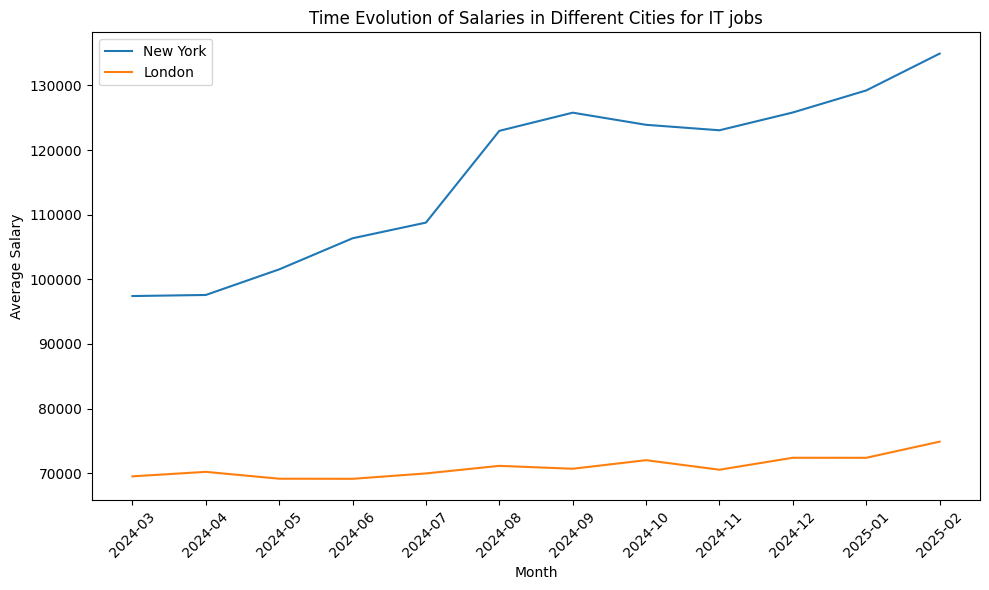

In [30]:
# Plot WITHOUT considering currency types (see later code cells for plots for better visualizations)

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV
df = pd.read_csv('historical_salary_data.csv')

# Plot the data
plt.figure(figsize=(10, 6))
for city in df.columns[1:]:
    plt.plot(df['Month'], df[city], label=city)

# Formatting the plot
plt.title('Time Evolution of Salaries in Different Cities for IT jobs')
plt.xlabel('Month')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
import requests
import pandas as pd
from urllib.parse import urlencode

# Adzuna API credentials
API_ID = 'bd010b52'
API_KEY = 'e6d1ecd1054f83fb1ef4f62d245375b1'

# Define the cities and their corresponding country codes
CITY_COUNTRY_MAP = {
    'New York': 'us',  # New York in the US
    'London': 'gb',    # London in the UK
}

# Define currency symbols for countries
CURRENCY_MAP = {
    'us': 'USD ($)',
    'gb': 'GBP (£)',
    'eu': 'EUR (€)'
}

# Base URL for fetching historical salary data from the Adzuna API
BASE_URL = 'https://api.adzuna.com/v1/api/jobs'


def fetch_historical_salary_data(city, country):
    """
    Fetch historical salary data for a given city and country from the Adzuna API.

    Args:
        city (str): The name of the city for which to fetch data.
        country (str): The country code corresponding to the city.

    Returns:
        dict: JSON response containing historical salary data, or None if the request fails.
    """
    # Construct the API request URL and parameters
    url = f"{BASE_URL}/{country}/history"
    params = {
        'app_id': API_ID,
        'app_key': API_KEY,
        'location0': 'US' if country == 'us' else 'UK',
        'location1': city,
        'category': 'it-jobs',
        'content-type': 'application/json'
    }

    # Log the full request URL
    full_url = f"{url}?{urlencode(params)}"
    print(f"Requesting: {full_url}")

    # Make the API request
    response = requests.get(url, params=params)

    # Check for a successful response
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data for {city}, {country}: {response.status_code}")
        return None


def process_salary_data(data, city):
    """
    Process the historical salary data into a DataFrame for further analysis.

    Args:
        data (dict): Historical salary data fetched from the API.
        city (str): The name of the city for which data is processed.

    Returns:
        pd.DataFrame: DataFrame containing processed historical salary data.
    """
    if data and 'month' in data:
        salary_data = data['month']
        processed_data = []

        for month, salary in salary_data.items():
            processed_data.append({
                'Month': month,
                city: salary
            })

        return pd.DataFrame(processed_data)
    else:
        print(f"No salary data found for {city}.")
        return pd.DataFrame()


def save_to_csv(df, filename):
    """
    Save the processed DataFrame to a CSV file.

    Args:
        df (pd.DataFrame): The DataFrame to be saved.
        filename (str): The name of the file to save the data to.
    """
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")


def main():
    """
    Main function to fetch, process, and save historical salary data for multiple cities.
    """
    all_data = {}  # Dictionary to hold salary data for each city

    # Iterate through each city-country pair
    for city, country in CITY_COUNTRY_MAP.items():
        # Fetch historical salary data
        data = fetch_historical_salary_data(city, country)

        if data:
            # Process the salary data and add to dictionary
            df = process_salary_data(data, city)
            if not df.empty:
                all_data[city] = df.set_index('Month')  # Use 'Month' as the index

    # Combine all city-specific DataFrames into a single DataFrame
    if all_data:
        combined_df = pd.concat(all_data.values(), axis=1, join='outer')  # Join on the 'Month' index
        combined_df.reset_index(inplace=True)  # Reset the index to include 'Month' as a column

        # Print the combined DataFrame for verification
        print(combined_df)

        # Save the combined DataFrame to a CSV file
        save_to_csv(combined_df, 'currency_historical_salary_data.csv')
    else:
        print("No data available to save.")


if __name__ == '__main__':
    main()


Requesting: https://api.adzuna.com/v1/api/jobs/us/history?app_id=bd010b52&app_key=e6d1ecd1054f83fb1ef4f62d245375b1&location0=US&location1=New+York&category=it-jobs&content-type=application%2Fjson
Requesting: https://api.adzuna.com/v1/api/jobs/gb/history?app_id=bd010b52&app_key=e6d1ecd1054f83fb1ef4f62d245375b1&location0=UK&location1=London&category=it-jobs&content-type=application%2Fjson
      Month   New York    London
0   2024-07  108775.35  69964.42
1   2025-01  129224.49  72382.48
2   2024-04   97577.03  70208.70
3   2024-11  123060.40  70538.11
4   2024-10  123907.56  72014.20
5   2024-12  125816.48  72388.74
6   2024-09  125783.95  70687.51
7   2024-05  101536.84  69148.23
8   2025-02  134926.53  74880.94
9   2024-03   97411.62  69510.33
10  2024-06  106348.26  69130.97
11  2024-08  122972.48  71137.48
Data saved to currency_historical_salary_data.csv


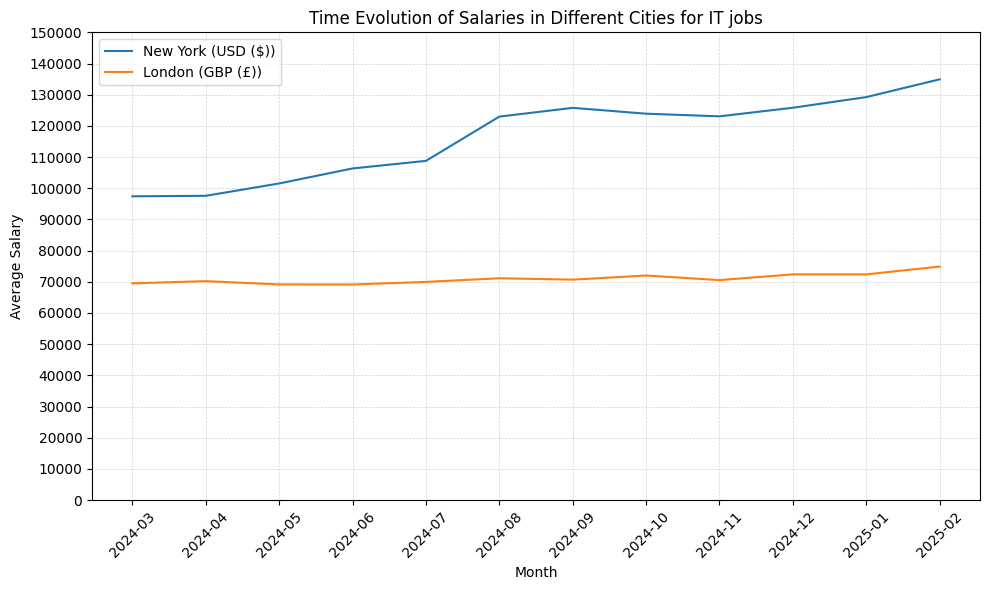

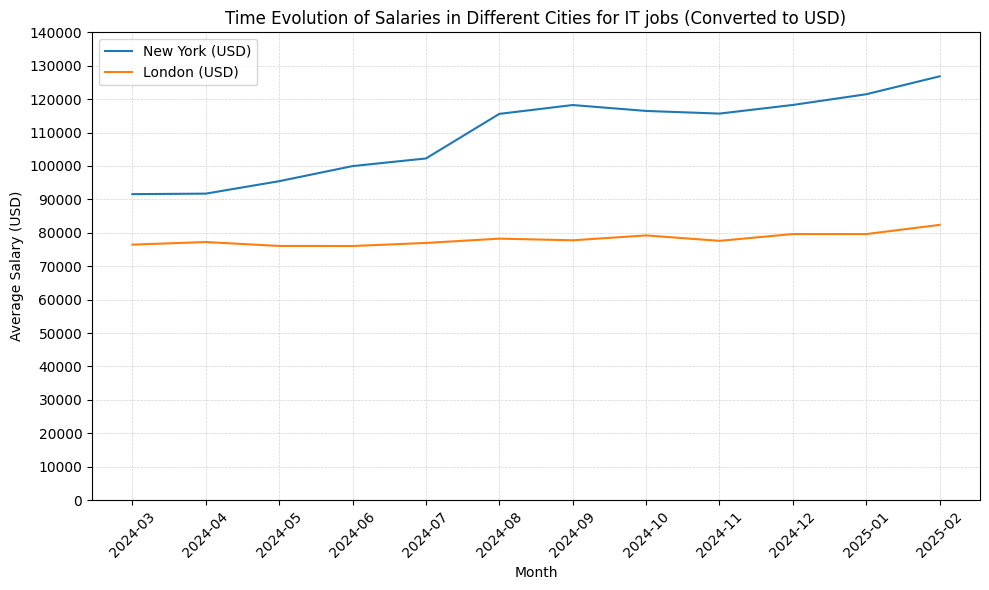

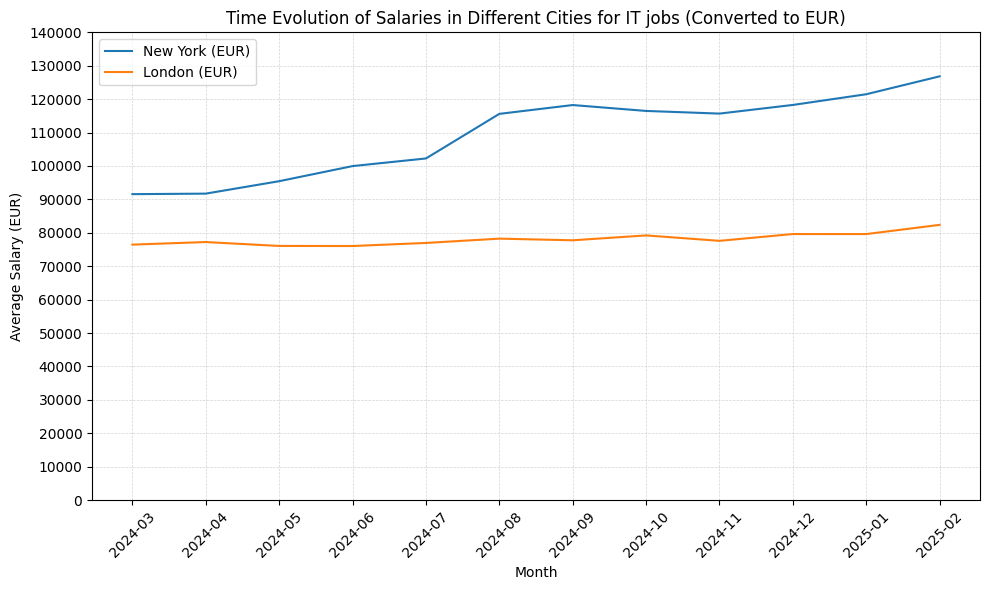

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV
df = pd.read_csv('historical_salary_data.csv')

# Define the currencies for each city and their conversion rates
city_currency = {
    'New York': 'USD ($)',  # USD remains unchanged
    'London': 'GBP (£)',    # Convert GBP to EUR
}

# Define conversion rates
conversion_rates = {
    'USD ($)': 0.94,  # 1 USD = 0.94 EUR
    'GBP (£)': 1.1,   # 1 GBP = 1.1 EUR
}

# Convert all salary values to USD
df_usd = df.copy()
for city in city_currency.keys():
    currency = city_currency[city]
    rate = conversion_rates[currency]
    df_usd[city] = df[city] * rate  # Apply conversion factor

# Convert all salary values to EUR
df_eur = df.copy()
for city in city_currency.keys():
    currency = city_currency[city]
    rate = conversion_rates[currency]
    df_eur[city] = df[city] * rate  # Apply conversion factor

# Determine the maximum salary for each plot
max_salary_original = df.iloc[:, 1:].max().max()
max_salary_usd = df_usd.iloc[:, 1:].max().max()
max_salary_eur = df_eur.iloc[:, 1:].max().max()

# Plot the original data
plt.figure(figsize=(10, 6))
for city in df.columns[1:]:
    currency = city_currency.get(city, '')
    plt.plot(df['Month'], df[city], label=f"{city} ({currency})")

# Formatting the original plot
plt.title('Time Evolution of Salaries in Different Cities for IT jobs')
plt.xlabel('Month')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=max_salary_original + 10000)
plt.yticks(np.arange(0, max_salary_original + 20000, 10000))
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the USD-converted data
plt.figure(figsize=(10, 6))
for city in df_usd.columns[1:]:
    plt.plot(df_usd['Month'], df_usd[city], label=f"{city} (USD)")

# Formatting the USD-converted plot
plt.title('Time Evolution of Salaries in Different Cities for IT jobs (Converted to USD)')
plt.xlabel('Month')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=max_salary_usd + 10000)
plt.yticks(np.arange(0, max_salary_usd + 20000, 10000))
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the EUR-converted data
plt.figure(figsize=(10, 6))
for city in df_eur.columns[1:]:
    plt.plot(df_eur['Month'], df_eur[city], label=f"{city} (EUR)")

# Formatting the EUR-converted plot
plt.title('Time Evolution of Salaries in Different Cities for IT jobs (Converted to EUR)')
plt.xlabel('Month')
plt.ylabel('Average Salary (EUR)')
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=max_salary_eur + 10000)
plt.yticks(np.arange(0, max_salary_eur + 20000, 10000))
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')
plt.legend()
plt.tight_layout()
plt.show()
